
0: 448x448 88 circles, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 448)


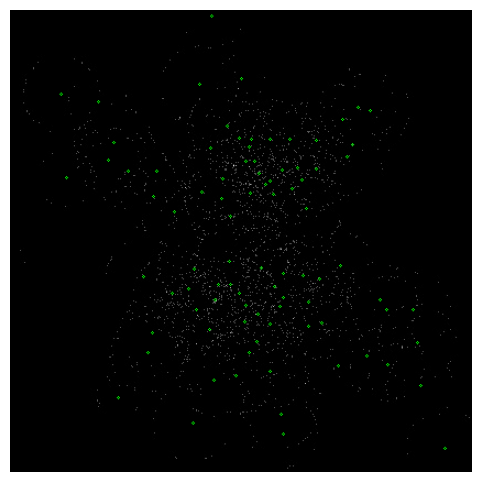

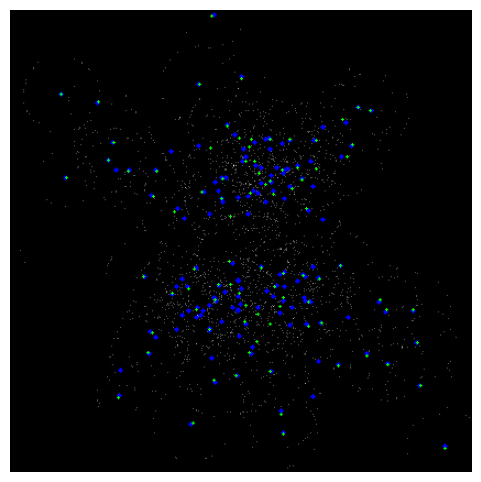

Number of predicted keypoints: 88
Number of ground truth keypoints: 147


([0.5681818181818182, 0.8409090909090909, 0.9090909090909091],
 [0.3401360544217687, 0.5034013605442177, 0.54421768707483],
 [0.425531914893617, 0.6297872340425532, 0.6808510638297872])

In [7]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np

image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/epoch21.pt'

results = kpl.inference(image_path, model_path, confidence=0.42, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(420, 420))

pred_points = kpl.keypoints_from_result(results[0])
gt_points = kpl.keypoints_from_txt(txt_path, img_size=(420, 420))
print(f'Number of predicted keypoints: {len(pred_points)}')
print(f'Number of ground truth keypoints: {len(gt_points)}')

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[2,4,6])

Epoch9 ==> @4px: p=0.811, r=0.497, f1=0.616 (conf=0.4, 90 centri) --- nota: è il migliore in pose (OKS)

Epoch14 ==> @4px: p=0.862, r=0.510, f1=0.641 (conf=0.4, 87 centri)

Epoch21 ==> @4px: p=0.824, r=0.510, f1=0.630 (conf=0.4, 91 centri)

Last (~60 epoche) ==> @4px: p=0.885, r=0.524 f1=0.658 (conf=0.4, 87 centri)


[INFO] Calcolo con conf=0.02 ...

[INFO] Calcolo con conf=0.04 ...

[INFO] Calcolo con conf=0.06 ...

[INFO] Calcolo con conf=0.08 ...

[INFO] Calcolo con conf=0.10 ...

[INFO] Calcolo con conf=0.12 ...

[INFO] Calcolo con conf=0.14 ...

[INFO] Calcolo con conf=0.16 ...

[INFO] Calcolo con conf=0.18 ...

[INFO] Calcolo con conf=0.20 ...

[INFO] Calcolo con conf=0.22 ...

[INFO] Calcolo con conf=0.24 ...

[INFO] Calcolo con conf=0.26 ...

[INFO] Calcolo con conf=0.28 ...

[INFO] Calcolo con conf=0.30 ...

[INFO] Calcolo con conf=0.32 ...

[INFO] Calcolo con conf=0.34 ...

[INFO] Calcolo con conf=0.36 ...

[INFO] Calcolo con conf=0.38 ...

[INFO] Calcolo con conf=0.40 ...

[INFO] Calcolo con conf=0.42 ...

[INFO] Calcolo con conf=0.44 ...

[INFO] Calcolo con conf=0.46 ...

[INFO] Calcolo con conf=0.48 ...

[INFO] Calcolo con conf=0.50 ...

[INFO] Calcolo con conf=0.52 ...

[INFO] Calcolo con conf=0.54 ...

[INFO] Calcolo con conf=0.56 ...

[INFO] Calcolo con conf=0.58 ...

Calcolata F1 

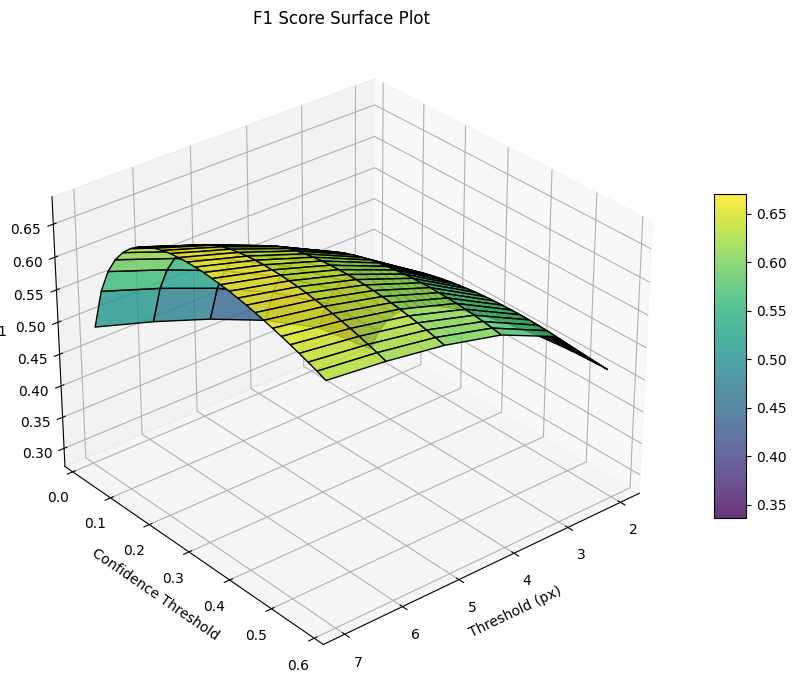

In [4]:
from KP import inference_F1map
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/labels/val'

f1_matrix = inference_F1map(images_path, txt_path, model_path, thresholds=[2, 3, 4, 5, 6, 7], conf_thresholds=np.arange(0.02, 0.6, 0.02), img_size=420)

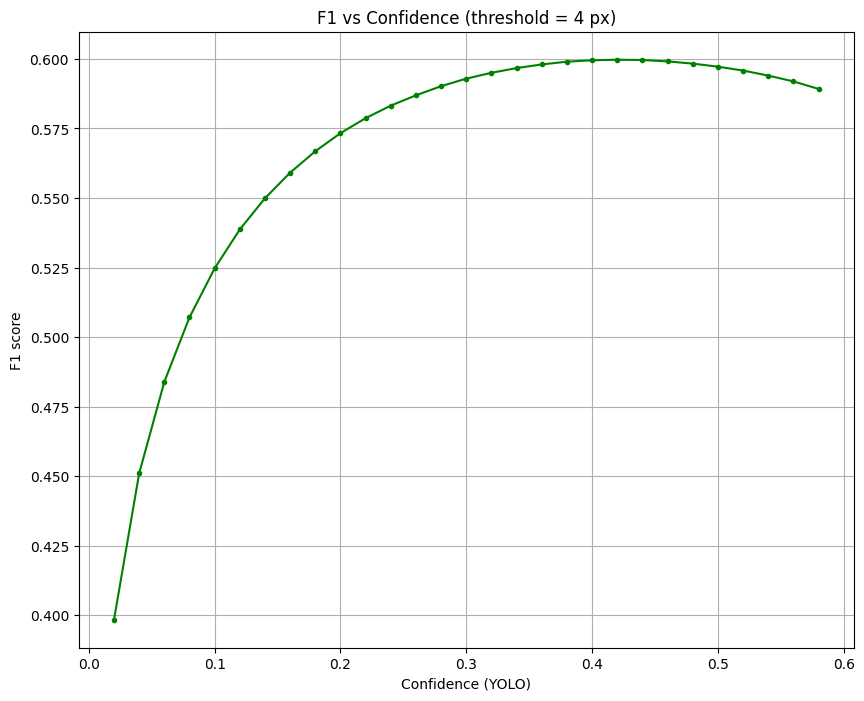

Max F1 score = 0.600 at confidence threshold = 0.42


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# leggi i file salvati
f1_matrix = pd.read_csv(
    '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/F1_matrix.csv',
    header=None
).values

thresholds = np.loadtxt('/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/F1_axis_thresholds_px.csv', delimiter=',')
confidences = np.loadtxt('/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/F1_axis_confidences.csv', delimiter=',')

# trova la colonna corrispondente a threshold=4
idx = np.where(thresholds == 4)[0][0]
f1_at_threshold = f1_matrix[:, idx]

# plot 2D
plt.figure(figsize=(10,8))
plt.plot(confidences, f1_at_threshold, marker='.', color='green')
plt.xlabel("Confidence (YOLO)")
plt.ylabel("F1 score")
plt.title("F1 vs Confidence (threshold = 4 px)")
plt.grid(True)
plt.show()

max_confidence = confidences[np.argmax(f1_at_threshold)]
print(f'Max F1 score = {np.max(f1_at_threshold):.3f} at confidence threshold = {max_confidence:.2f}')

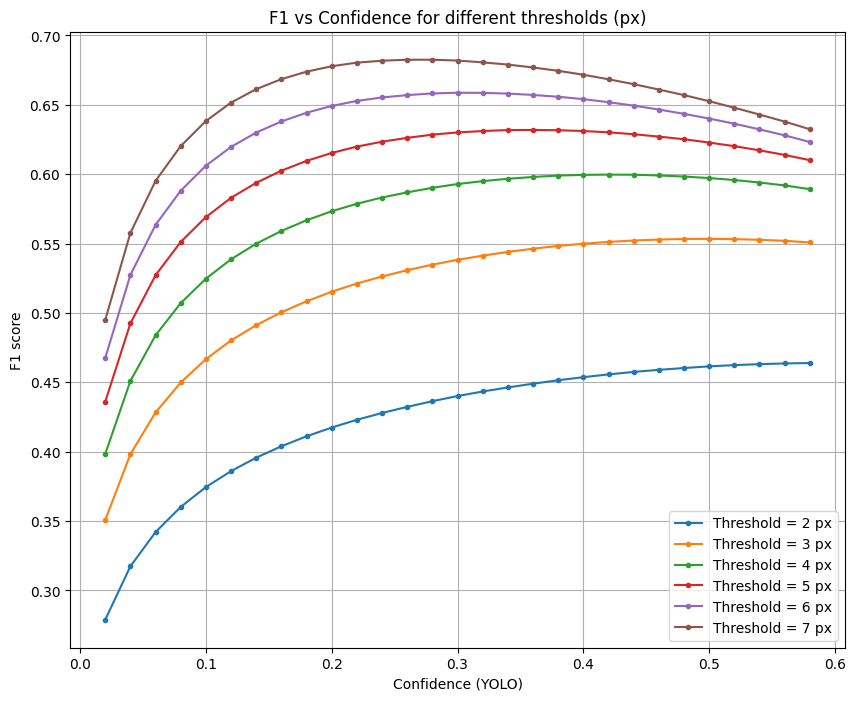

In [62]:
plt.figure(figsize=(10,8))
for i, thr in enumerate(thresholds):
    plt.plot(confidences, f1_matrix[:, i], marker='.', label=f'Threshold = {int(thr)} px')

plt.xlabel("Confidence (YOLO)")
plt.ylabel("F1 score")
plt.title("F1 vs Confidence for different thresholds (px)")
plt.legend()
plt.grid(True)
plt.show()

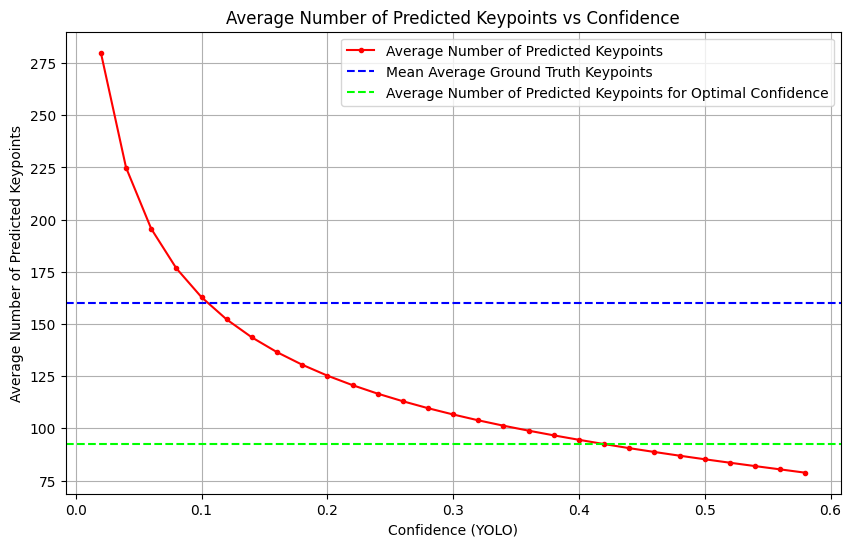

In [63]:
average_pred = pd.read_csv(
    '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/avg_preds_per_conf.csv',
    header=None
).values.flatten()  # assicura array 1D

plt.figure(figsize=(10,6))
plt.plot(confidences, average_pred, marker='.', color='red', label='Average Number of Predicted Keypoints')
plt.axhline(y=160, color='blue', linestyle='--', label='Mean Average Ground Truth Keypoints')
plt.axhline(y=average_pred[np.argmax(f1_at_threshold)], color='lime', linestyle='--', label='Average Number of Predicted Keypoints for Optimal Confidence')
plt.xlabel("Confidence (YOLO)")
plt.ylabel("Average Number of Predicted Keypoints")
plt.title("Average Number of Predicted Keypoints vs Confidence")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from KP import inference_setImages

model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/420px/labels/val'

thresholds = [4]

stats = inference_setImages(images_path, txt_path, model_path, thresholds=thresholds, img_size=420, confidence=0.42)


== Risultati medi su 10347 immagini ==
Threshold 4.0px ==> Precision: 0.815 | Recall: 0.475 | F1: 0.600
Inferenza media: 0.028 sec/immagine



0: 448x448 88 circles, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 448)


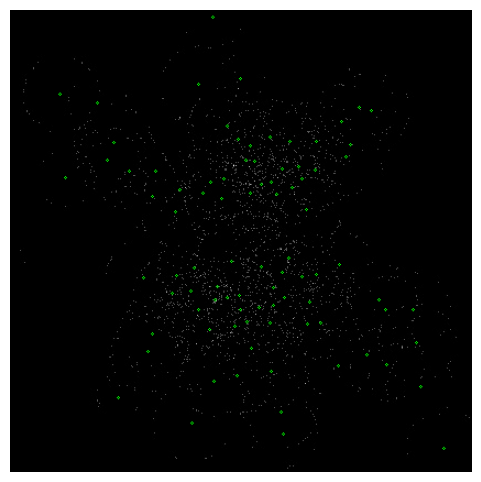

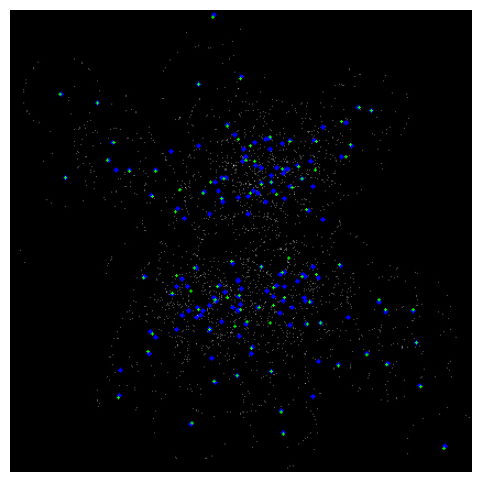

Number of predicted keypoints: 88
Number of ground truth keypoints: 147


([0.6590909090909091, 0.8522727272727273, 0.9318181818181818],
 [0.3945578231292517, 0.5102040816326531, 0.5578231292517006],
 [0.4936170212765957, 0.6382978723404255, 0.6978723404255318])

In [6]:
image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/Prova420.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/420px/training_output_HIGHlosspose/weights/last.pt'

results = kpl.inference(image_path, model_path, confidence=0.42, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(420, 420))

pred_points = kpl.keypoints_from_result(results[0])
gt_points = kpl.keypoints_from_txt(txt_path, img_size=(420, 420))
print(f'Number of predicted keypoints: {len(pred_points)}')
print(f'Number of ground truth keypoints: {len(gt_points)}')

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[2,4,6])